# Red Neuronal Artificial para la predicción de enfermedades cardíacas

![Logo](https://enlinea.tecmm.mx/moodle/pluginfile.php/1/theme_roshnilite/logo/1756935571/tecjalisco%20azul.png)

- **Autor:** _Eduardo Efrain Garcia Sarez_

  > **27/11/2025**

- **Institución:** **Instituto Tecnológico Superior de Jalisco (TSJ)**.  
- **Carrera:** **Ingeniería en Sistemas Computacionales**

En este notebook nos centraremos en implementar una **FNN** (Feedforward Neural Network) capaz de aprender el patrones dentro de un dataset de enfermedades cardiacas. Los temas son los siguientes:

1. Descripción de las Características del Dataset
   - 1.1 Variables Clínicas

2. Descripción de Librerías, Clases y Funciones
   - 2.1 Pandas
   - 2.2 TensorFlow/Keras
   - 2.3 Scikit-learn
   - 2.4 NumPy

3. Pipeline de Desarrollo
   - 3.1 Model Selection
     - Razones para emplear una Red Neuronal Profunda
     - Razones para emplear la API de Keras
     - Código: Carga y preparación de datos
   - 3.2 Model Training
     - Construcción del modelo
     - Compilación del modelo
     - Entrenamiento del modelo
   - 3.3 Prediction
     - Ejemplo de uso con un paciente
     - Predicciones para múltiples pacientes

4. Model Evaluation
   - 4.1 Descripción de Métricas
     - Accuracy (Exactitud)
     - Confusion Matrix (Matriz de Confusión)
     - Visualización de Confusion Matrix
     - Visualización de curvas de entrenamiento

5. Conclusiones

## 1. Descripción de las características del Dataset

El dataset utilizado para este ejemplo fue tomado del artículo: [**“Build Your First Neural Network with TensorFlow: A Step-by-Step Guide”**](https://drlee.io/build-your-first-neural-network-with-tensorflow-a-step-by-step-guide-1dd3e6652cf1).
Sin embargo, este dataset también se encuentra disponible en la librería de datos públicos del **UC Irvine Machine Learning Repository** ([https://github.com/uci-ml-repo/ucimlrepo](https://github.com/uci-ml-repo/ucimlrepo)), la cual cuenta con más estudios y datasets disponibles en su sitio web oficial: [https://archive.ics.uci.edu/datasets](https://archive.ics.uci.edu/datasets). 

A continuación se muestra su composición.

### Variables Clínicas

- **age**: Edad del paciente (en años)
- **sex**: Sexo del paciente (1 = masculino, 0 = femenino)
- **cp**: Tipo de dolor torácico
  - 0: Angina típica
  - 1: Angina atípica
  - 2: Dolor no anginoso
  - 3: Asintomático
- **trestbps**: Presión arterial en reposo (mm Hg)
- **chol**: Colesterol sérico (mg/dl)
- **fbs**: Glucosa en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)
- **restecg**: Resultados del electrocardiograma en reposo
  - 0: Normal
  - 1: Anormalidad en onda ST-T
  - 2: Hipertrofia ventricular izquierda
- **thalach**: Frecuencia cardíaca máxima alcanzada
- **exang**: Angina inducida por ejercicio (1 = sí, 0 = no)
- **oldpeak**: Depresión del ST inducida por ejercicio
- **slope**: Pendiente del segmento ST durante ejercicio máximo
  - 0: Ascendente
  - 1: Plana
  - 2: Descendente
- **ca**: Número de vasos principales coloreados por fluoroscopia (0-3)
- **thal**: Talasemia
  - 1: Normal
  - 2: Defecto fijo
  - 3: Defecto reversible
- **target**: Variable objetivo (1 = presencia de enfermedad cardíaca, 0 = ausencia)

## 2. Descripción de Librerías, Clases y Funciones

### 2.1 Pandas

**Librería**: Manipulación y análisis de datos

**Funciones empleadas**:

- `pd.read_csv()`: Carga datos desde archivo CSV
  - Parámetros: `filepath` (ruta del archivo)
- `df.head()`: Muestra las primeras 5 filas del DataFrame
- `df.columns`: Retorna nombres de columnas
- `df.drop()`: Elimina columnas especificadas
  - Parámetros: `columns` (lista de columnas), `axis=1` (eje de columnas)
- `df.values`: Convierte DataFrame a array NumPy

### 2.2 TensorFlow/Keras

**Librería**: Construcción y entrenamiento de redes neuronales

**Clases y funciones**:

- `Sequential()`: Crea modelo secuencial de capas apiladas
- `Dense()`: Capa totalmente conectada
  - Parámetros: `units` (número de neuronas), `activation` (función de activación), `input_shape` (forma de entrada)
- `model.compile()`: Configura el proceso de aprendizaje
  - Parámetros: `optimizer` (algoritmo de optimización), `loss` (función de pérdida), `metrics` (métricas a monitorear)
- `model.fit()`: Entrena el modelo
  - Parámetros: `x` (datos de entrada), `y` (etiquetas), `epochs` (iteraciones), `batch_size` (tamaño de lote), `validation_split` (porcentaje para validación)
- `model.predict()`: Genera predicciones
  - Parámetros: `x` (datos de entrada)
- `model.evaluate()`: Evalúa el modelo
  - Parámetros: `x` (datos de prueba), `y` (etiquetas de prueba)

### 2.3 Scikit-learn

**Librería**: Herramientas de machine learning

**Funciones empleadas**:

- `train_test_split()`: Divide datos en conjuntos de entrenamiento y prueba
  - Parámetros: `X`, `y`, `test_size` (proporción de prueba), `random_state` (semilla aleatoria)
- `confusion_matrix()`: Calcula matriz de confusión
  - Parámetros: `y_true` (valores reales), `y_pred` (predicciones)

### 2.4 NumPy

**Librería**: Operaciones numéricas con arrays

**Funciones empleadas**:

- `np.round()`: Redondea valores
- `np.array()`: Crea arrays NumPy

## 3. Pipeline de Desarrollo

### 3.1 Model Selection

El uso de una **FFNN (FeedForward Neural Network)** se justifica dado que nos enfrentamos a un problema de **clasificación múltiple**, en el cual, a partir de un conjunto de características, se espera obtener una salida específica. En este caso particular, las posibles salidas son **positiva** o **negativa**.

Además, se cuenta con un conjunto de datos previamente **etiquetados**, lo que permite adoptar un enfoque de **entrenamiento supervisado**, escenario en el que este tipo de redes neuronales demuestra un desempeño destacado.

**Arquitectura seleccionada**:

- Red neuronal feedforward con múltiples capas densas
- Función de activación ReLU en capas ocultas (introduce no linealidad)
- Función de activación Sigmoid en capa de salida (clasificación binaria)
- Optimizador Adam (adaptativo, convergencia rápida)
- Binary Crossentropy como función de pérdida (estándar para clasificación binaria)

Se optó por utilizar **`TensorFlow`** debido a que constituye uno de los principales referentes en el ámbito del *Deep Learning*. En contraste con **`Scikit-Learn`**, TensorFlow es una biblioteca más completa y robusta, ya que permite **entrenar y ejecutar modelos tanto en CPU como en GPU**, lo que proporciona un rendimiento significativamente superior. Asimismo, su arquitectura **multiplataforma** resulta altamente adecuada para diversos entornos de desarrollo y producción.

De igual manera, se decidió emplear la API **`Keras`**, integrada de forma nativa en `TensorFlow`, por las siguientes razones:

- **Simplicidad y claridad sintáctica**: Keras ofrece una interfaz de alto nivel que facilita la construcción de redes neuronales mediante un código más legible y estructurado.
- **Flexibilidad operativa**: La API *Sequential* permite definir modelos de manera lineal, lo cual resulta apropiado para arquitecturas *feedforward* y prototipos iniciales.
- **Integración nativa con TensorFlow**: Al ser la API oficial de alto nivel de TensorFlow, Keras aprovecha de forma directa las optimizaciones del backend, incluyendo aceleración por hardware.
- **Agilidad en el prototipado**: Su diseño promueve la rápida experimentación, ajuste de hiperparámetros y validación de modelos, reduciendo significativamente los tiempos de desarrollo.

Empezemos con la demostracion en codigo:

**Carga y preparación de datos**

In [52]:
"""
Primero importaremos todas las librerías necesarias:
1. pandas: para manejo de dataframes y lectura de archivos CSV
2. numpy: para operaciones numéricas eficientes
3. sklearn: para dividir los datos en conjuntos de entrenamiento y prueba
4. tensorflow.keras: para crear y entrenar redes neuronales
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset desde un archivo CSV en línea
df = pd.read_csv(
    "https://raw.githubusercontent.com/fenago/deep-learning-essentials/main/HeartDiseaseTrain-Test.csv"
)

# Manejo de valores faltantes: eliminar filas que contengan NaN
df = df.dropna()

# Separar las características de entrada (X) y la variable objetivo (y)
X = df.drop(columns=["target"])  # 'target' es la columna que queremos predecir
y = df["target"].values  # Extraemos los valores de la columna objetivo

# Codificar variables categóricas en X usando One-Hot Encoding
# drop_first=True evita la multicolinealidad eliminando la primera columna de cada categoría
X = pd.get_dummies(X, drop_first=True)

# Codificar la variable objetivo binaria y
# Esto convierte categorías como 'sí/no' o '0/1' en números 0 y 1
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Para clasificación binaria

# Número de características de entrada después de codificación
n_features = X.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos 10% de los datos para testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Mostrar la forma de los conjuntos de entrenamiento y prueba
print(f"Forma de datos de entrenamiento: {X_train.shape}")
print(f"Forma de datos de prueba: {X_test.shape}")

Forma de datos de entrenamiento: (922, 22)
Forma de datos de prueba: (103, 22)


### 3.2 Model Training

**Este es el codigo de _construccion_, _Compilacion_ y entrenamiento de un modelo de deepLearning con `TensorFlow/Keras`**

In [53]:
"""
Declaración del modelo: tenemos un total de 4 capas internas con 112 neuronas en total,
más las neuronas de entrada y salida. El modelo se estructura de la siguiente forma:

Entrada (n características)
       │
     Dense 64 (ReLU)
       │
     Dense 32 (ReLU)
       │
     Dense 16 (ReLU)
       │
     Salida 1 (Sigmoid)

- Sequential: API de Keras que permite definir modelos capa por capa de manera lineal.
- Dense: Capa totalmente conectada donde cada neurona recibe entradas de todas las neuronas de la capa anterior.
- ReLU (Rectified Linear Unit): Función de activación que devuelve 0 si el valor es negativo y el valor mismo si es positivo. Ayuda a introducir no linealidad.
- Sigmoid: Función de activación que devuelve valores entre 0 y 1, ideal para clasificación binaria.
- input_shape: Forma (dimensionalidad) de los datos de entrada que la primera capa espera recibir.
"""
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# Se define cómo se entrenará el modelo:
# - optimizer: Algoritmo para actualizar los pesos, puede ser adam o cualquier otro como sgd.
# - loss: Función de pérdida para medir el error (binary_crossentropy para clasificación binaria)
# - metrics: Métricas para evaluar el rendimiento
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
# Ajusta los pesos del modelo mediante el conjunto de entrenamiento
# - X_train, y_train: datos de entrada y etiquetas
# - epochs: número de pasadas completas por los datos
# - batch_size: número de muestras por actualización de pesos
# - validation_split: porcentaje de datos para validación
# - verbose: nivel de detalle de salida
history = model.fit(
    X_train, 
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


# Resumen del modelo
# Muestra la arquitectura, número de parámetros y forma de cada capa
model.summary()

C:\Users\yefra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

### 3.3 Prediction

Ejecutaremos el modelo para observar los resultados obtenidos y compararlos con los datos del conjunto de prueba (testing).

In [54]:
# Predecir probabilidades para todas las muestras de prueba
predicciones_prob = model.predict(X_test, verbose=0)

# Mostrar resultados comparando predicción vs valor real
resultados = pd.DataFrame({
    'Predicción': predicciones,
    'Real': y_test
})

# Calcular exactitud sobre todo el conjunto de prueba
accuracy = np.mean(predicciones == y_test)
print(f"\nExactitud sobre el conjunto de prueba: {accuracy*100:.2f}%")

print(resultados)


Exactitud sobre el conjunto de prueba: 82.52%
     Predicción  Real
0             1     1
1             1     1
2             0     0
3             1     1
4             0     0
..          ...   ...
98            0     0
99            0     0
100           1     1
101           0     0
102           1     0

[103 rows x 2 columns]


## 4. Model Evaluation

### 4.1 Descripción de Métricas

#### Accuracy

Proporcióna la media entre de predicciones correctas sobre el total de predicciones realizadas.

**Fórmula**:

```psh
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

Tu definición es correcta, solo que puedo ajustarla y explicarla un poco más formalmente y clara:

---

#### Accuracy (Exactitud)

La **exactitud** mide la proporción de predicciones correctas realizadas por el modelo respecto al total de predicciones.

**Fórmula**:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Donde:

- **TP** (True Positives): Predicciones correctas de clase positiva
- **TN** (True Negatives): Predicciones correctas de clase negativa
- **FP** (False Positives): Predicciones incorrectas de clase positiva
- **FN** (False Negatives): Predicciones incorrectas de clase negativa

#### Confusion Matrix

La **matriz de confusión** es una tabla que permite visualizar el rendimiento de un modelo, comparando las predicciones con los valores reales.

**Estructura**:

```text
                  Predicción
                Negativo  Positivo
Real Negativo      TN        FP
     Positivo      FN        TP
```

**Elementos**:

- **True Negatives (TN)**: Pacientes sin enfermedad correctamente clasificados.
- **False Positives (FP)**: Pacientes sin enfermedad incorrectamente clasificados como enfermos (Error Tipo I).
- **False Negatives (FN)**: Pacientes con enfermedad incorrectamente clasificados como sanos (Error Tipo II, más crítico en medicina).
- **True Positives (TP)**: Pacientes con enfermedad correctamente clasificados.

### 4.2 Código de Evaluación


ACCURACY (EXACTITUD)
Accuracy del modelo: 82.52%
Predicciones correctas: 85 de 103

CONFUSION MATRIX (MATRIZ DE CONFUSIÓN)
[[51  7]
 [12 33]]

Elementos de la Matriz de Confusión:
  True Negatives (TN):  51 - Correctamente clasificados como SIN enfermedad
  False Positives (FP): 7 - Incorrectamente clasificados como CON enfermedad
  False Negatives (FN): 12 - Incorrectamente clasificados como SIN enfermedad
  True Positives (TP):  33 - Correctamente clasificados como CON enfermedad


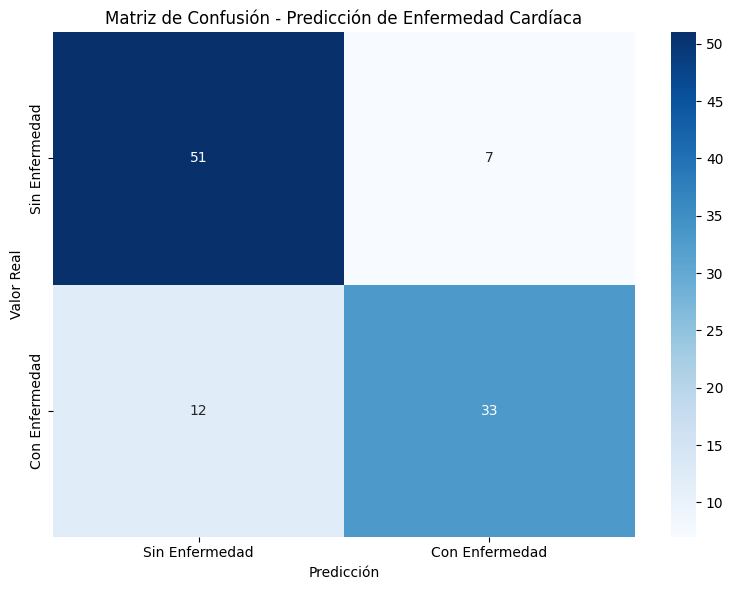

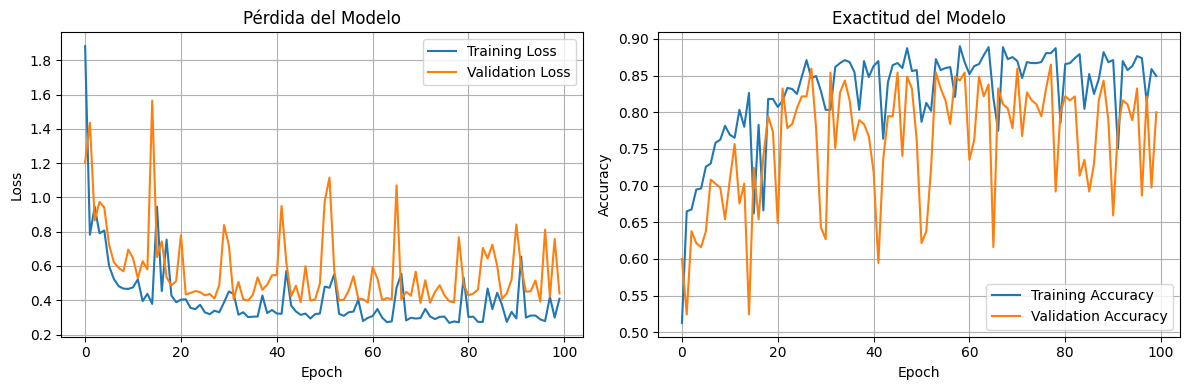

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en conjunto de prueba
y_pred = (predicciones_prob > 0.5).astype(int).flatten()

# mostrar Accuracy
print(f"\n{'='*50}")
print(f"ACCURACY (EXACTITUD)")
print(f"{'='*50}")
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")
print(f"Predicciones correctas: {int(accuracy * len(y_test))} de {len(y_test)}")

# Calcular Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f"\n{'='*50}")
print(f"CONFUSION MATRIX (MATRIZ DE CONFUSIÓN)")
print(f"{'='*50}")
print(cm)

# Extraer elementos de la matriz
tn, fp, fn, tp = cm.ravel()

print(f"\nElementos de la Matriz de Confusión:")
print(f"  True Negatives (TN):  {tn} - Correctamente clasificados como SIN enfermedad")
print(f"  False Positives (FP): {fp} - Incorrectamente clasificados como CON enfermedad")
print(f"  False Negatives (FN): {fn} - Incorrectamente clasificados como SIN enfermedad")
print(f"  True Positives (TP):  {tp} - Correctamente clasificados como CON enfermedad")

# Visualizar Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sin Enfermedad', 'Con Enfermedad'],
            yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Predicción de Enfermedad Cardíaca')
plt.tight_layout()
plt.show()

# Visualizar curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Exactitud del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusiones

El modelo alcanzó una **exactitud superior al 82%**, lo que indica que cumple con los objetivos iniciales. A partir de este punto, es posible implementar diversas mejoras para intentar incrementar su desempeño.

Entre las acciones recomendadas se encuentran:

- **Utilizar la totalidad del dataset** para entrenar el modelo y evaluar si la exactitud mejora.
- **Ajustar los hiperparámetros**, como la cantidad de neuronas en cada capa, las funciones de activación o el optimizador, para optimizar el rendimiento.

Finalmente, al observar la gráfica de entrenamiento, se nota que la optimización pudo haberse detenido entre las **épocas 22 y 30**, ya que el modelo alcanzó puntos cercanos al óptimo con menos iteraciones, lo que sugiere eficiencia en la convergencia.
